<a href="https://colab.research.google.com/github/sanaaria/Ann/blob/main/Ann_Hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_data="/content/drive/MyDrive/kaggle2/seg_train/seg_train"

In [3]:
test_data="/content/drive/MyDrive/kaggle2/seg_test/seg_test"

In [4]:
pred_data="/content/drive/MyDrive/kaggle2/seg_pred"

In [5]:
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [6]:
import os
import torch
import tarfile
import torchvision
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

In [7]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
transform_train = transforms.Compose([
    
    transforms.Resize((150,150)), #becasue vgg takes 150*150
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])

#Augmentation is not done for test/validation data.
transform_test = transforms.Compose([
    
    transforms.Resize((150,150)), #becasue vgg takes 150*150
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])

In [9]:
train_ds = ImageFolder(train_data, transform=transform_train)
test_ds = ImageFolder(test_data, transform=transform_test)
pred_ds = ImageFolder(pred_data, transform=transform_test)

In [10]:
print(train_ds.classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [11]:
import os


In [12]:
sea_files = os.listdir(train_data+ "/sea")
print(len(sea_files))

2274


In [13]:
classes = os.listdir(test_data )
print(classes)

['sea', 'mountain', 'glacier', 'street', 'forest']


In [14]:
sea_files = os.listdir(test_data + "/sea")
print(len(sea_files))

510


In [15]:
classes = os.listdir(pred_data )
print(classes)

['seg_pred']


In [16]:
len(train_ds),len(test_ds),len(pred_ds)

(14034, 10301, 6165)

In [17]:
image,label  = train_ds[0]
print(image.shape, label)

torch.Size([3, 150, 150]) 0


In [18]:
image

tensor([[[ 0.9373,  0.9373,  0.9451,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9373,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9294,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         ...,
         [-0.6314, -0.5137, -0.6157,  ..., -0.6000, -0.6471, -0.2627],
         [-0.3961, -0.6314, -0.6627,  ..., -0.8275, -0.5686, -0.6941],
         [-0.5373, -0.5686, -0.5294,  ..., -0.7569, -0.6000, -0.5059]],

        [[ 0.9373,  0.9373,  0.9451,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9373,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9294,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         ...,
         [-0.6392, -0.5216, -0.6235,  ..., -0.6392, -0.6863, -0.3020],
         [-0.4039, -0.6392, -0.6706,  ..., -0.8667, -0.6078, -0.7333],
         [-0.5451, -0.5765, -0.5373,  ..., -0.7961, -0.6392, -0.5451]],

        [[ 0.9216,  0.9216,  0.9294,  ...,  0.9451,  0.9216,  0.9216],
         [ 0.9137,  0.9216,  0.9216,  ...,  0

In [19]:
image.numpy()

array([[[ 0.9372549 ,  0.9372549 ,  0.94509804, ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.9372549 ,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.92941177,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        ...,
        [-0.6313726 , -0.5137255 , -0.6156863 , ..., -0.6       ,
         -0.64705884, -0.26274508],
        [-0.3960784 , -0.6313726 , -0.6627451 , ..., -0.827451  ,
         -0.5686275 , -0.69411767],
        [-0.5372549 , -0.5686275 , -0.5294118 , ..., -0.75686276,
         -0.6       , -0.5058824 ]],

       [[ 0.9372549 ,  0.9372549 ,  0.94509804, ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.9372549 ,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.92941177,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        ...,
        [-0.6392157 , -0.52156866, -0.62352943, ..., -

ساخت دیتا لودری کهداده هارا بچ بچ کند :)

In [20]:
batch_size=128
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)
pred_dl = DataLoader(pred_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [21]:
batch_size=128
train_dl2 = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 3, 150, 150])


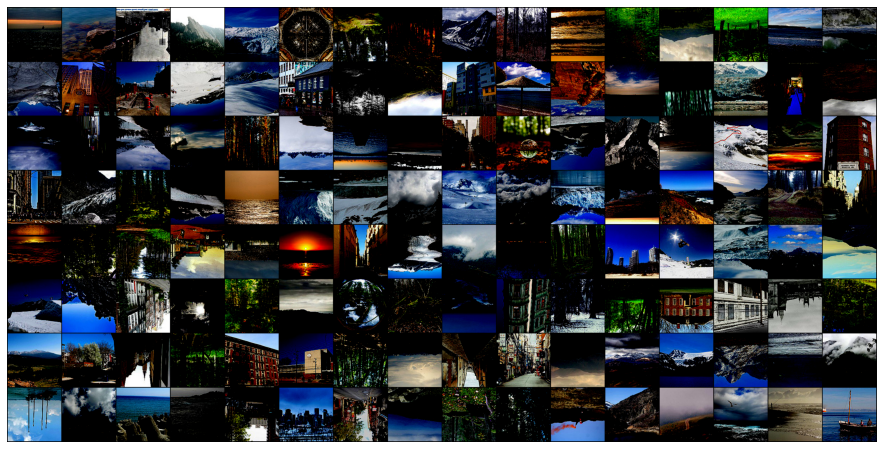

In [22]:
for images, _ in train_dl2:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

ساخت تابعی برای محاسبه ی accuracy

In [23]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))